Computing basic statistics of data

In [1]:
import networkx as nx

# Load graph 
G = nx.read_graphml("../../dataExtracted/THE_GRAPH.graphml")
n_nodes=G.number_of_nodes()
n_edges=G.number_of_edges()
density= nx.density(G)
avg_degree= sum(dict(G.degree()).values()) / n_nodes
avg_clustering= nx.average_clustering(G)
largest_cc= max(nx.connected_components(G), key=len)
avg_shortest_path=nx.average_shortest_path_length(G.subgraph(largest_cc))
diameter=nx.diameter(G.subgraph(largest_cc))
print(f"Nodes: {n_nodes}")
print(f"Edges: {n_edges}")
print(f"Density: {density:.4f}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Average clustering coefficient: {avg_clustering:.3f}")
print(f"Average shortest path (largest CC): {avg_shortest_path:.2f}")
print(f"Diameter (largest CC): {diameter}")


Nodes: 1031
Edges: 1674
Density: 0.0032
Average degree: 3.25
Average clustering coefficient: 0.052
Average shortest path (largest CC): 8.82
Diameter (largest CC): 20


Degree distribution plot and CCDF


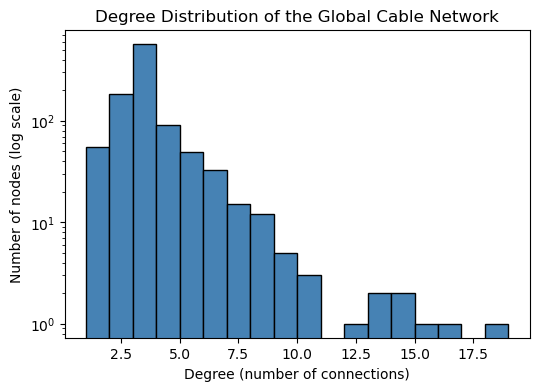

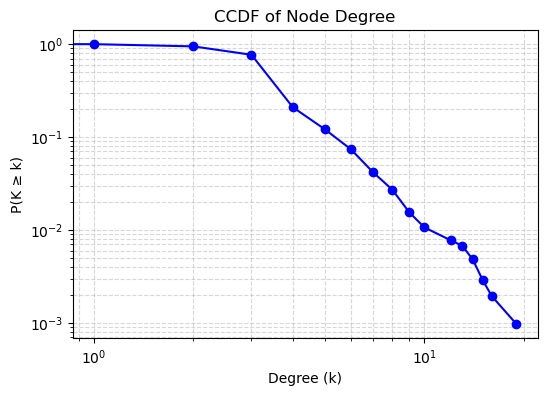

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
degrees = [d for _, d in G.degree()]
plt.figure(figsize=(6,4))
plt.hist(degrees, bins=range(1, max(degrees)+1), color='steelblue', edgecolor='black', log=True)
plt.xlabel("Degree (number of connections)")
plt.ylabel("Number of nodes (log scale)")
plt.title("Degree Distribution of the Global Cable Network")
plt.show()
deg_freq= dict(Counter(degrees))
deg_freq = dict(sorted(deg_freq.items()))
degrees_sorted = list(deg_freq.keys())
counts = np.array(list(deg_freq.values()))
ccdf = np.cumsum(counts[::-1])[::-1] / sum(counts)
plt.figure(figsize=(6,4))
plt.loglog(degrees_sorted, ccdf, marker='o', linestyle='-', color='b')
plt.xlabel('Degree (k)')
plt.ylabel('P(K ≥ k)')
plt.title('CCDF of Node Degree')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()


Comparing clustering of the graph to a random graph

In [4]:
G_random = nx.gnm_random_graph(n_nodes, n_edges)
largest_cc_rnd = max(nx.connected_components(G_random), key=len)
G_largest_random = G_random.subgraph(largest_cc_rnd).copy()
print(f"Random graph clustering: {nx.average_clustering(G_random):.3f}")
print(f"Random graph avg path length (approx): {nx.average_shortest_path_length(G_largest_random):.2f}")
print(f"Random graph diameter: {nx.diameter(G_largest_random):.3f}")


Random graph clustering: 0.003
Random graph avg path length (approx): 5.88
Random graph diameter: 13.000
